# Ejercicio 1
 ---


**A) Determinar el período de la secuencia de Von Neumann generada a partir de las semillas:**
- 3009
- 7600
- 1234
- 4321

In [1]:
from generators import Von_Neumann

seeds = [3009, 7600, 1234, 4321]
for seed in seeds:
    period = Von_Neumann.period(seed=seed)
    print(f"El periodo de la semilla [{seed}] es -> {period}")

El periodo de la semilla [3009] es -> 4
El periodo de la semilla [7600] es -> 1
El periodo de la semilla [1234] es -> 57
El periodo de la semilla [4321] es -> 71


**B) Dar el valor de c y de a para que cada generador tenga período máximo.**
- $y_{i+1}=5y_i+c \bmod(2⁵)$ -> Generador lineal congruencial **mixto**
- $x_{i+1}=ax_i \bmod(31)$ -> Generador lineal congruencial **multiplicativo**

**Considerar el generador** $z_{i+1}=x_i+y_i \bmod(2⁵)$ **y calcular su período.** 

In [2]:
# Ejemplo del Generador Lineal Congruencial Mixto
from generators import LinearCongruentialMixed
congruential_mixed = LinearCongruentialMixed.is_maximum_period(a=5, c=3, M=16)
print(f"El Generador Congruencial Lineal Mixto tiene periodo MÁXIMO -> {congruential_mixed}")

El Generador Congruencial Lineal Mixto tiene periodo MÁXIMO -> True


In [3]:
# Ejemplo del Generador Lineal Congruencial Multiplicativo
from generators import LinearCongruentialMultiplicative
primitive_root_candidates = LinearCongruentialMultiplicative.root_primitive_candidates(M=31)
print(f"Los candidatos a raíz primitiva son -> {primitive_root_candidates}")

Descomposición Prima de 30 -> [2, 3, 5]
Los candidatos a raíz primitiva son -> [3, 11, 12, 13, 17, 21, 22, 24]


**Representación gráfica de $(y_i,y_i+1), (x_i,x_i+1)$ y $(z_i,z_i+1)$**

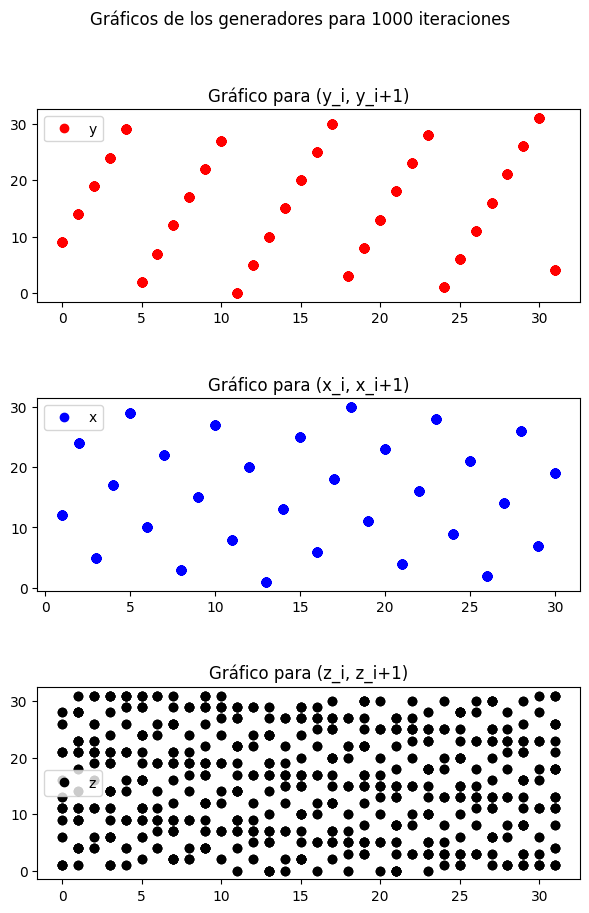

In [4]:
# Generador** $z_{i+1}=x_i+y_i \bmod(2⁵) y calcular su período. 
import matplotlib.pyplot as plt
from generators import InventedCongruentialWithSumm

# Test generador_nuevo
ys, xs, zs = InventedCongruentialWithSumm.invented_congruential_sum(a=12, c=9,M=32 ,iterations=1000, X_seed=1, Y_seed=1)

fig, ax = plt.subplots(3, 1, figsize=(7,10))

fig.subplots_adjust(hspace=0.5) 

ax[0].plot(ys[:-1], ys[1:], 'ro', label='y')
ax[0].set_title("Gráfico para (y_i, y_i+1)")
ax[0].legend()

ax[1].plot(xs[:-1], xs[1:], 'bo', label='x')
ax[1].set_title("Gráfico para (x_i, x_i+1)")
ax[1].legend()

ax[2].plot(zs[:-1], zs[1:], 'ko', label='z')
ax[2].set_title("Gráfico para (z_i, z_i+1)")
ax[2].legend()

plt.suptitle("Gráficos de los generadores para 1000 iteraciones")
plt.show()

**C) Indicar en cuáles de los siguientes casos el generador:**
- $y_{i+1}=ay_i+c \bmod(M)$

**genera una secuencia de período máximo.**

In [5]:
from generators import LinearCongruentialMixed
#(a,c,M)
inputs = [(125,3,2**9), (123,3,2**9), (125,3,2**9), (5,0,71), (7,0,71)]

for inps in inputs:
    print(f"a = {inps[0]}, c = {inps[1]}, M = {inps[2]} genera una secuencia de período máximo -> {LinearCongruentialMixed.is_maximum_period(inps[0],inps[1], inps[2])}")

a = 125, c = 3, M = 512 genera una secuencia de período máximo -> True
a = 123, c = 3, M = 512 genera una secuencia de período máximo -> False
a = 125, c = 3, M = 512 genera una secuencia de período máximo -> True
a = 5, c = 0, M = 71 genera una secuencia de período máximo -> False
a = 7, c = 0, M = 71 genera una secuencia de período máximo -> False


**d) Utilice el generador RANDU**
- $u_i=a*u_i-1$

con los valores:
- $a=2^{16}+3$
- $M=2^{31}$

**Para generar puntos aleatorios en el cubo** $[0,M), [0,M), [0,M)$ de la forma
- $(u_1,u_2,u_3), (u_4,u_5,u_6)...$

**Y estimar el porcentaje de los puntos que caen en la esfera centrada en (M/2,M/2,M/2) de radio M/10**

**Repetir el procedimiento con:**
- $a=7^{5}$
- $M=2^{31}-1$

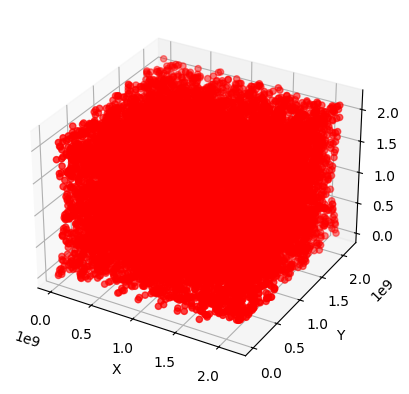

In [6]:
from generators import Randu
import matplotlib.pyplot as plt

# Seed
a = (2 ** 16) + 3
M = 2 ** 31
seed = 1
iterations = 50000
randu_generation = Randu.randu_generator(
    a=a, seed=seed, M=M, iterations=iterations)

# Seteo las tuplas
xs = randu_generation[0::3]
ys = randu_generation[1::3]
zs = randu_generation[2::3]


# Plot 3D de los puntos generados con ternas (u_i, u_i+1, u_i+2)
# Rotarlo para encontrar los hiperplanos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



  <img src="imgs/Figure_1.png" alt="imgs/image.png" style="width: 430px;"/>


^--------- **hiperplanos**

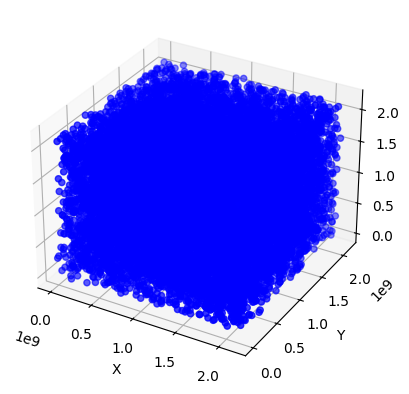

In [7]:
# Ahora probamos con la otra entrada

# Seed
a = 7 ** 5
M_1 = (2 ** 31) - 1
seed = 1
iterations = 50000
randu_generation = Randu.randu_generator(
    a=a, seed=seed, M=M_1, iterations=iterations)

# Seteo las tuplas
xs1 = randu_generation[0::3]
ys1 = randu_generation[1::3]
zs1 = randu_generation[2::3]


# Plot 3D de los puntos generados con ternas (u_i, u_i+1, u_i+2)
# Rotarlo para encontrar los hiperplanos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs1, ys1, zs1, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


  <img src="imgs/Figure_2.png" alt="imgs/image.png" style="width: 430px;"/>

^---------- **Para esta entrada no se aprecian hiperplanos**


In [8]:
import math
# Estimacion de puntos que entran en una esfera de radio M/10
# en el cubo de lado 
# Esto deberia darnos cercano a el cociente volumen de la esfera / volumen del cubo
def estimation_of_points_on_sphere(xs:list[int], ys:list[int], zs:list[int], M:int) -> int:
    counter = 0
    for i in range(0, int(50001 / 3)):
        if (xs[i] - M / 2)**2 + (ys[i] - M / 2)**2 + (zs[i] - M / 2)**2 <= (M / 10)**2:
            counter += 1

    points_estimation = counter / (50001 / 3)
    print(f"Estimacion de puntos en la esfera: {points_estimation}")
    print(4 * math.pi / 3000)
    return points_estimation

In [9]:
estimation_1 = estimation_of_points_on_sphere(xs=xs, ys=ys, zs=zs, M=M)
estimation_2 = estimation_of_points_on_sphere(xs=xs1, ys=ys1, zs=zs1, M=M_1)
max_estimation = estimation_1 if estimation_1 > estimation_2 else estimation_2
print(f"El valor de la mayor estimacion de puntos en la esfera es: {max_estimation}")


Estimacion de puntos en la esfera: 0.004019919601607968
0.0041887902047863905
Estimacion de puntos en la esfera: 0.004319913601727965
0.0041887902047863905
El valor de la mayor estimacion de puntos en la esfera es: 0.004319913601727965


---
# Ejercicio 2



**b) Implementar un algoritmo en computadora que estime la probabilidad de ganar, esto es, la fracción de veces que se gana en n realizaciones del juego. Completar con la siguiente tabla:**

| n       | 100 | 1000 | 10000 | 100000 | 100000 |
|---------|-----|------|-------|--------|--------|
| $P[X>=1]$ | 0.770000    |  0.668000    |    0.673500   | 0.666400      | 0.666884 |

**a) La probabilidad de ganar es 0.6667**

**b) Se pide estimar la probabilidad de ganar para ciertas iteraciones.**

In [10]:
from random import random

def simulate_game():
    U = random()
    if U < 0.5:
        # Sumar 2 números aleatorios
        X = random() + random()
    else:
        # Sumar 3 números aleatorios
        X = random() + random() + random()
    return X >= 1

def estimate_probability(n: int) -> float:
    wins = 0
    for _ in range(n):
        if simulate_game():
            wins += 1
    probability = wins / n
    print(f"Con n: {n:7} | P(X >= 1) = {probability:.6f}")


estimate_probability(100)
estimate_probability(1000)
estimate_probability(10000)
estimate_probability(100000)
estimate_probability(1000000)

Con n:     100 | P(X >= 1) = 0.600000
Con n:    1000 | P(X >= 1) = 0.661000
Con n:   10000 | P(X >= 1) = 0.659900
Con n:  100000 | P(X >= 1) = 0.666770
Con n: 1000000 | P(X >= 1) = 0.666997


---
# Ejercicio 3

- Las máquinas tragamonedas usualmente generan un premio cuando hay un acierto.
- Sup. que se genera un acierto con el siguiente esquema -> Se genera un número aleatorio y:
    - Si es menor a $1/3$, se suman dos nuevos números aleatorios
    - Si es mayor o igual a un tercio, se suman tre números aleatorios.

- Si el resultado de la suma es menor o igual a 2, se genera un acierto.


**a) La probabilidad de acertar es**

**b) Se pide estimar la probabilidad de acertar**
- Esto es la fracción de veces que se acierta en n realizaciones del juego.

| n       | 100 | 1000 | 10000 | 100000 | 1000000 |
|---------|-----|------|-------|--------|--------|
| $$P[X<=2]$$ | 0.810000 |  0.892000  |   0.887300   |  0.882310   |  0.883371 |

In [1]:
from random import random

def simulate_slot_machine():
    U = random()
    if U < 0.3:
        # Sumar 2 números aleatorios
        X = random() + random()
    else:
        # Sumar 3 números aleatorios
        X = random() + random() + random()
    return X <= 2

def estimate_probability(n: int) -> float:
    wins = 0
    for _ in range(n):
        if simulate_slot_machine():
            wins += 1
    probability = wins / n
    print(f"Con n: {n:7} | P(X <= 2) = {probability:.6f}")


estimate_probability(100)
estimate_probability(1000)
estimate_probability(10000)
estimate_probability(100000)
estimate_probability(1000000)

Con n:     100 | P(X <= 2) = 0.820000
Con n:    1000 | P(X <= 2) = 0.898000
Con n:   10000 | P(X <= 2) = 0.884500
Con n:  100000 | P(X <= 2) = 0.884240
Con n: 1000000 | P(X <= 2) = 0.883642


---
# Ejercicio 4

**a)La probabilidad de que un cliente espere menos de 4 minutos para ser atendido es de 65.1%**

**b) Dado que el cliente tuvo que esperar más de 4 minutos:**
- **La probabilidad de que el cliente haya elegido alguna caja:**

    - Caja 1: 30.21%

    - Caja 2: 33.73%

    - Caja 3: 36.05%

**c) Simular el problema y estimar las probabilidades anteriores con 1000 iteraciones**

In [ ]:
from random import random
from scipy.stats import expon

BOX_1:float = 0.40
LAMBDA_1 = 3
BOX_2:float = 0.32
LAMBDA_2 = 4
BOX_3:float = 0.28
LAMBDA_3 = 5

SEPARATOR_BOX_1 = BOX_1
SEPARATOR_BOX_2 = BOX_2 + SEPARATOR_BOX_1
SEPARATOR_BOX_3 = SEPARATOR_BOX_2 + BOX_3

def client_wait_less_than_4_minutes(iterations: int) -> float:
    please_wait:float = 0
    count_less_than_4_minutes = 0
    
    for _ in range(iterations):
        #Probabilidad de una uniforme
        U = random() 
        if U < SEPARATOR_BOX_1:
            please_wait = expon.rvs(scale=LAMBDA_1) 
        elif U < SEPARATOR_BOX_2:
            please_wait = expon.rvs(scale=LAMBDA_2) 
        elif U < SEPARATOR_BOX_3:
            please_wait = expon.rvs(scale=LAMBDA_3) 
        
        count_less_than_4_minutes +=1 if please_wait < 4.0 else 0
    
    return count_less_than_4_minutes/iterations

def client_choose_each_box(iterations:int) -> list[float, float, float]:
    
    box_probability:list = []
    count_box_1 = 0
    count_box_2 = 0
    count_box_3 = 0
    
    for _ in range(iterations):
        #Probabilidad de una uniforme
        U = random() 
        if U < SEPARATOR_BOX_1:
            please_wait = expon.rvs(scale=3) 
            if please_wait > 4.0:
                count_box_1+=1
        elif U < SEPARATOR_BOX_2:
            please_wait = expon.rvs(scale=4) 
            if please_wait > 4.0:
                count_box_2+=1
        elif U < SEPARATOR_BOX_3:
            please_wait = expon.rvs(scale=5) 
            if please_wait > 4.0:
                count_box_3+=1
        else:
            print("[ERROR] Esto nunca debería ejecutarse")

    #Debo tener en cuenta la cantidad de clientes que fueron atendidos luego de 4 minutos
    waited_more_than_4 = count_box_1 + count_box_2 + count_box_3

    box_probability.append(count_box_1/waited_more_than_4)
    box_probability.append(count_box_2/waited_more_than_4)
    box_probability.append(count_box_3/waited_more_than_4)
    
    return box_probability

In [ ]:
REAL_PROB_A:float = 0.651 
REAL_PROB_B_BOX_1:float = 0.3021
REAL_PROB_B_BOX_2:float = 0.3373
REAL_PROB_B_BOX_3:float = 0.3605

#a)
prob_a = client_wait_less_than_4_minutes(iterations=1000)
print(f"La probabilidad [SIMULADA] de que un cliente\n espere menos de 4 minutos para ser atendido es de {prob_a}")
print(f" [ERROR COMETIDO] {abs(prob_a-REAL_PROB_A)}")

#b)
print("-"*20)
prob_b = client_choose_each_box(iterations=1000)
print("La probabilidad [SIMULADA] de que un cliente haya elegido alguna caja:")
print(f"\t - CAJA 1: {prob_b[0]} | [ERROR COMETIDO] -> {abs(REAL_PROB_B_BOX_1-prob_b[0])}")
print(f"\t - CAJA 2: {prob_b[1]} | [ERROR COMETIDO] -> {abs(REAL_PROB_B_BOX_2-prob_b[1])}")
print(f"\t - CAJA 3: {prob_b[2]} | [ERROR COMETIDO] -> {abs(REAL_PROB_B_BOX_3-prob_b[2])}")

La probabilidad [SIMULADA] de que un cliente
 espere menos de 4 minutos para ser atendido es de 0.629
 [ERROR COMETIDO] 0.02200000000000002
--------------------
La probabilidad [SIMULADA] de que un cliente haya elegido alguna caja:
	 - CAJA 1: 0.3054054054054054 | [ERROR COMETIDO] -> 0.003305405405405415
	 - CAJA 2: 0.34054054054054056 | [ERROR COMETIDO] -> 0.0032405405405405707
	 - CAJA 3: 0.35405405405405405 | [ERROR COMETIDO] -> 0.006445945945945941


---
# Ejercicio 5

In [4]:
from monte_carlo import MonteCarlo
#Iteraciones de la consigna
iterations = [1000, 5000, 10000]
table_iterations = [100, 1000, 10000, 1000000, 1000000]

**a)** $\int\limits^{1}_{0} \left(1 - x^{2}\right)^{\frac{3}{2}} \, \mathrm{d}x = \frac{3\pi}{16}$

In [17]:
from math import pi
def g(x:int) -> float:
    return (1 - (x ** 2)) ** (3/2)

REAL_RESULT_A = (3*pi) / 16

aproximation_1 = MonteCarlo.integral_montecarlo_0_1(f=g, N=iterations[0])
aproximation_2 = MonteCarlo.integral_montecarlo_0_1(f=g, N=iterations[1])
aproximation_3 = MonteCarlo.integral_montecarlo_0_1(f=g, N=iterations[2])

MonteCarlo.log(real_result=REAL_RESULT_A,
                aproximations=[aproximation_1, aproximation_2, aproximation_3],
                iterations=iterations)

[VALOR REAL] -> 0.5890486225480862

[APROXIMACIÓN] con [1000 ITERACIONES] ~ 0.5940775366210488
[ERROR] 0.005028914072962576

[APROXIMACIÓN] con [5000 ITERACIONES] ~ 0.5912913601920731
[ERROR] 0.0022427376439868585

[APROXIMACIÓN] con [10000 ITERACIONES] ~ 0.589567885275929
[ERROR] 0.0005192627278427508



**b) $\int\limits^{3}_{2} \frac{x}{x^{2} - 1} \, \mathrm{d}x = \frac{\ln\left(8\right)}{2} - \frac{\ln\left(3\right)}{2} \approx 0.4904146265058631$**

In [18]:
from math import log
def g(x:float) -> float:
    return (x)/((x**2)-1)

REAL_RESULT_B = log(8)/2 - log(3)/2
A = 2
B = 3

aproximations:list[float] = []
for i in iterations:
    aproximations.append(MonteCarlo.integral_montecarlo_a_b(a=A, b=B, g=g, N=i))
    
MonteCarlo.log(real_result=REAL_RESULT_B, aproximations=aproximations, iterations=iterations)

[VALOR REAL] -> 0.490414626505863

[APROXIMACIÓN] con [1000 ITERACIONES] ~ 0.4942892893238987
[ERROR] 0.0038746628180357234

[APROXIMACIÓN] con [5000 ITERACIONES] ~ 0.4913547352110237
[ERROR] 0.0009401087051607027

[APROXIMACIÓN] con [10000 ITERACIONES] ~ 0.48937036328224337
[ERROR] 0.0010442632236196125



**5c)** $\int\limits^{\infty}_{0} x \left(x^{2} + 1\right)^{-2} \, \mathrm{d}x = \frac{1}{2}$ 

In [19]:
def f(x):
    return x*(1 + (x**2))**(-2)

REAL_RESULT_C = 0.5

aproximations: list[float] = []

for i in iterations:
    aproximations.append(MonteCarlo.integral_montecarlo_0_plusInf(f=f, N=i))

MonteCarlo.log(real_result=REAL_RESULT_C,
               aproximations=aproximations,
               iterations=iterations)

[VALOR REAL] -> 0.5

[APROXIMACIÓN] con [1000 ITERACIONES] ~ 0.5307403384197336
[ERROR] 0.03074033841973356

[APROXIMACIÓN] con [5000 ITERACIONES] ~ 0.49746515228611304
[ERROR] 0.0025348477138869563

[APROXIMACIÓN] con [10000 ITERACIONES] ~ 0.5004858812127853
[ERROR] 0.0004858812127852552



**5d)** $\int\limits^{\infty}_{-\infty} \mathrm{e}^{-x^{2}} \, \mathrm{d}x = \sqrt{\pi}$


La integral entre -inf e inf de e^(-x²) = 2 integral entre 0 e inf de e^(-x²) dx

In [20]:
from math import exp, sqrt, pi
from monte_carlo import MonteCarlo

def f(x):
    return exp(-x**2)

REAL_RESULT_D = sqrt(pi)

aproximations: list[float] = []

for i in iterations:
    aproximations.append(MonteCarlo.integral_montecarlo_minusInf_plusInf(f=f, N=i))

MonteCarlo.log(real_result=REAL_RESULT_D,
               aproximations=aproximations,
               iterations=iterations)


[VALOR REAL] -> 1.7724538509055159

[APROXIMACIÓN] con [1000 ITERACIONES] ~ 1.8157555291563563
[ERROR] 0.043301678250840414

[APROXIMACIÓN] con [5000 ITERACIONES] ~ 1.7532132501545923
[ERROR] 0.019240600750923598

[APROXIMACIÓN] con [10000 ITERACIONES] ~ 1.7753235765137092
[ERROR] 0.0028697256081933187



**e)** $\int _0^1\cdot [ \int _0^1e^{^{\left(x+y\right)^2}}dx] \cdot dy\: \approx 4.89916$ 

In [21]:
from math import exp, sqrt, pi
from monte_carlo import MonteCarlo

def f(x, y):
    return exp((x+y)**2)

REAL_RESULT_E = 4.89916

aproximations: list[float] = []

for i in iterations:
    aproximations.append(MonteCarlo.integral_montecarlo_0_1_n_vars(g=f,n_vars=2, N=i))

MonteCarlo.log(real_result=REAL_RESULT_E,
               aproximations=aproximations,
               iterations=iterations)


[VALOR REAL] -> 4.89916

[APROXIMACIÓN] con [1000 ITERACIONES] ~ 4.964393286391221
[ERROR] 0.06523328639122106

[APROXIMACIÓN] con [5000 ITERACIONES] ~ 5.00595359653587
[ERROR] 0.10679359653587017

[APROXIMACIÓN] con [10000 ITERACIONES] ~ 4.867335730325454
[ERROR] 0.0318242696745461



**f)** $\int _0^{\infty}\cdot [ \int _0^xe^{^{-(x+y)}}dy] \cdot dx\: = \frac{1}{2}$

En este caso como tenemos integral doble con un límite de integración a $x$ definimos `f` como:

$$f(x,y) = e^{-(x+y)}* I_{x<y}$$

Donde $I_{x<y}=$

\begin{cases}
1 & \text{si } x < y \\
0 & \text{si } x \geq y
\end{cases}

Luego obtenemos la equivalencia de:

$$\int _0^{\infty} \int _0^{\infty}e^{^{-(x+y)}} \cdot I_{x<y} dy \cdot dx\: = \frac{1}{2}$$

In [22]:
from utils import I
from math import e

def f(x, y):
    return e ** -(x+y) * I(x,y)

REAL_RESULT_F = 0.5

aproximations: list[float] = []

for i in iterations:
    aproximations.append(MonteCarlo.integral_montecarlo_0_plusInf_n_vars(g=f, n_vars=2, N=i))

MonteCarlo.log(real_result=REAL_RESULT_F,
               aproximations=aproximations,
               iterations=iterations)


[VALOR REAL] -> 0.5

[APROXIMACIÓN] con [1000 ITERACIONES] ~ 0.5001182261989904
[ERROR] 0.00011822619899037878

[APROXIMACIÓN] con [5000 ITERACIONES] ~ 0.500452691603895
[ERROR] 0.00045269160389505014

[APROXIMACIÓN] con [10000 ITERACIONES] ~ 0.4931073927187377
[ERROR] 0.006892607281262286



Resultados finales para llenar la tabla

In [34]:
from math import pi, log, sqrt

def a_point(x:int) -> float:
    return (1 - (x ** 2)) ** (3/2)

def b_point(x:float) -> float:
    return (x)/((x**2)-1)

def c_point(x):
    return x*(1 + (x**2))**(-2)

def d_point(x):
    return exp(-x**2)

def e_point(x, y):
    return exp((x+y)**2)

def f_point(x, y):
    return e ** -(x+y) * I(x,y)

REAL_RESULTS = [REAL_RESULT_A, REAL_RESULT_B, REAL_RESULT_C, REAL_RESULT_D, REAL_RESULT_E, REAL_RESULT_F]

print("="*25+"a"+"="*25)
for n in table_iterations:
    aproximation = MonteCarlo.integral_montecarlo_0_1(f=a_point, N=n)
    print(f"n: {n:<10} aproximacion: {aproximation:<12}")
print(f"[VALOR EXACTO] = {REAL_RESULTS[0]}")    
print("="*51)

print("\n"+"="*25+"b"+"="*25)
for n in table_iterations:
    aproximation = MonteCarlo.integral_montecarlo_a_b(a=2, b=3, g=b_point, N=i)
    print(f"n: {n:<10} aproximacion: {aproximation:<12}")
print(f"[VALOR EXACTO] = {REAL_RESULTS[1]}")    
print("="*51)

print("\n"+"="*25+"c"+"="*25)
for n in table_iterations:
    aproximation = MonteCarlo.integral_montecarlo_0_plusInf(f=c_point, N=i)
    print(f"n: {n:<10} aproximacion: {aproximation:<12}")
print(f"[VALOR EXACTO] = {REAL_RESULTS[2]}")    
print("="*51)

print("\n"+"="*25+"d"+"="*25)
for n in table_iterations:
    aproximation = MonteCarlo.integral_montecarlo_minusInf_plusInf(f=d_point, N=i)
    print(f"n: {n:<10} aproximacion: {aproximation:<12}")
print(f"[VALOR EXACTO] = {REAL_RESULTS[3]}")    
print("="*51)

print("\n"+"="*25+"e"+"="*25)
for n in table_iterations:
    aproximation = MonteCarlo.integral_montecarlo_0_1_n_vars(g=e_point,n_vars=2, N=n)
    print(f"n: {n:<10} aproximacion: {aproximation:<12}")
print(f"[VALOR EXACTO] = {REAL_RESULTS[4]}")    
print("="*51)

print("\n"+"="*25+"f"+"="*25)
for n in table_iterations:
    aproximation = MonteCarlo.integral_montecarlo_0_plusInf_n_vars(g=f_point, n_vars=2, N=i)
    print(f"n: {n:<10} aproximacion: {aproximation:<12}")
print(f"[VALOR EXACTO] = {REAL_RESULTS[5]}")    
print("="*51)


=========================a=========================
n: 100        aproximacion: 0.5724008904957775
n: 1000       aproximacion: 0.6125131299146034
n: 10000      aproximacion: 0.5909564919896314
n: 1000000    aproximacion: 0.5887374294538029
n: 1000000    aproximacion: 0.5888530299091211
[VALOR EXACTO] = 0.5890486225480862

=========================b=========================
n: 100        aproximacion: 0.49008532221124906
n: 1000       aproximacion: 0.48979756922210044
n: 10000      aproximacion: 0.4907074473816621
n: 1000000    aproximacion: 0.4912931009345232
n: 1000000    aproximacion: 0.48957016427991057
[VALOR EXACTO] = 0.490414626505863

=========================c=========================
n: 100        aproximacion: 0.4999838066942903
n: 1000       aproximacion: 0.49964820764978757
n: 10000      aproximacion: 0.49834271422023413
n: 1000000    aproximacion: 0.5016539137933793
n: 1000000    aproximacion: 0.49830324806637655
[VALOR EXACTO] = 0.5

=========================d============

---
# Ejercicio 6


- Se pide aproximar el valor de $\pi$ calculando el área de un círculo de radio 1 centrado en 0.

- Generar N puntos aleatorios en la caja $[-1,1] x [-1,1]$ y contar la cantidad de veces que los mismos caen dentro del círculo.

- El cociente entre el número de veces que caen dentro del círculo y Nm multiplicado por 4 es una aproximación de $\pi$

In [3]:
from random import random

def pi_value(N:int) -> tuple:
    pi_numbers:list[float] = []
    in_circle = 0
    for _ in range(N):
        # Necesito de dos variables aleatorias
        x = 2 * random() - 1
        y = 2 * random() - 1
        if x ** 2 + y ** 2 <= 1:
            pi_numbers.append((x, y))
            in_circle += 1
    return pi_numbers, 4 * in_circle / N

In [5]:
from math import pi

pi_numbers_for_iteration = []
pi_aproximations = 0

print(f"[VALOR COMPUTARIZADO] π ~ {pi} ")

# Aproximación de PIchiclin
for i in [1000, 10000, 100000, 1000000, 10000000]:
    print("\n"+"="*25+"π"+"="*25)
    result = pi_value(N=i)
    pi_numbers_for_iteration.append(result[0])
    pi_aproximation = result[1]
    print(f"n: {i:<10} aproximacion: {pi_aproximation:<12}")
    print(f"[ERROR COMETIDO] = {abs(pi - pi_aproximation)}")  
    print("="*51)


[VALOR COMPUTARIZADO] π ~ 3.141592653589793 

=========================π=========================
n: 1000       aproximacion: 3.024       
[ERROR COMETIDO] = 0.1175926535897931

=========================π=========================
n: 10000      aproximacion: 3.1732      
[ERROR COMETIDO] = 0.031607346410206905

=========================π=========================
n: 100000     aproximacion: 3.15064     
[ERROR COMETIDO] = 0.009047346410206991

=========================π=========================
n: 1000000    aproximacion: 3.144956    
[ERROR COMETIDO] = 0.003363346410206969

=========================π=========================
n: 10000000   aproximacion: 3.141512    
[ERROR COMETIDO] = 8.065358979303383e-05


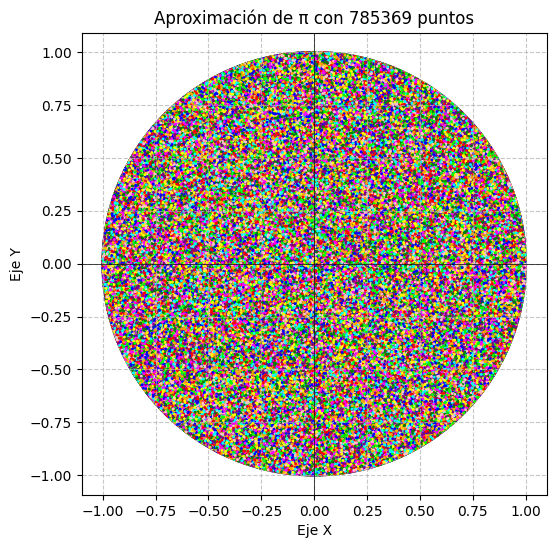

In [17]:
import matplotlib.pyplot as plt

from utils import map_colors_in_number

# pi_numbers_for_iteration:list[float]
#[0] -> 1000 iteraciones
#[1] -> 10000 iteraciones
#[2] -> 100000 iteraciones
#[3] -> 1000000 iteraciones
#[4] -> 10000000 iteraciones

# Gráfico
fig, ax = plt.subplots(figsize=(6, 6))

circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='-', linewidth=2)
ax.add_patch(circle)

# Puntos
points = pi_numbers_for_iteration[3]
iterations = len(points)

x_vals = [x for x, y in points]
y_vals = [y for x, y in points]

colors:list[str] = map_colors_in_number(x_vals)

ax.scatter(x_vals, y_vals, color=colors, s=1, alpha=1, label='Puntos dentro del círculo')

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title(f'Aproximación de π con {iterations} puntos')


plt.axis('equal')  # Para que la escala en X e Y sea igual (evita deformación)
plt.show()

# Ejercicio 7

a)

In [ ]:
from random import random
from math import e
    
for N in [100, 1000, 100000, 1000000]:
    counters = []
    print("\n"+"="*25+"E[N]"+"="*25)
    for _ in range(N):
        adds = 0
        counter = 0
        while adds <= 1:
            adds += random()
            counter += 1
        counters.append(counter)
    expectation_estimation = sum(counters) / N
    print(f"n: {N:<10} aproximacion: {expectation_estimation:<12}")
    print(f"[ERROR COMETIDO] = {abs(e - expectation_estimation)}")  
    print("="*51)


=========================E[N]=========================
n: 100        aproximacion: 2.64        
[ERROR COMETIDO] = 0.07828182845904497

=========================E[N]=========================
n: 1000       aproximacion: 2.726       
[ERROR COMETIDO] = 0.007718171540954888

=========================E[N]=========================
n: 100000     aproximacion: 2.71944     
[ERROR COMETIDO] = 0.0011581715409549886

=========================E[N]=========================
n: 1000000    aproximacion: 2.717717    
[ERROR COMETIDO] = 0.0005648284590451524


**b)** El valor exacto de E[N] es $e$

---
# Ejercicio 8

**a)**

In [27]:
from random import random
from math import e

def N_random_var() -> int:
    """
    Variable aleatoria que devuelve el máximo n tal que la productoria
        de i=1 hasta n de U_i sea mayor que e^(-3)

    Returns:
        int: Máximo n tal que se cumple la condición
    """
    #Caso base
    productory = 1
    n = 0
    e_to_the_minus_three = e ** (-3)
    # Mientras sea la productoria mayor a e^-3 sigo aumentando el n
    while productory >= e_to_the_minus_three:
        productory *= random()
        if not productory >= e_to_the_minus_three:
            break
        else:
            n += 1

    return n

def expectation_estimation(iterations:int) -> float:
    p = 0
    for _ in range(iterations):
        p += N_random_var()
    return p / iterations

print("\n"+"="*25+"E[N]"+"="*25)
for n in [100, 1000, 10000, 100000, 1000000]:
    print(f"n: {n:<10} aproximacion: {expectation_estimation(iterations=n):<12}")
print("="*25+"E[N]"+"="*25)


=========================E[N]=========================
n: 100        aproximacion: 3.17        
n: 1000       aproximacion: 3.02        
n: 10000      aproximacion: 3.0028      
n: 100000     aproximacion: 2.99781     
n: 1000000    aproximacion: 3.001265    
=========================E[N]=========================


**b) Ahora se pide estimar $P(N=i)$ para $i=0,1,2,3,4,5,6$ usando $n=1000000$**


In [22]:
def probability_N_equals_i(i: int, iterations: int) -> float:
    """
    Probabilidad de que la variable aleatoria N

    Args:
        i (int): valor discreto
        iterations (int): número de iteraciones

    Returns:
        float: probabilidad sobre la cantidad de iteraciones realizadas.
    """
    probability = 0
    for _ in range(iterations):
        # Utilizo la variable aleatorio para generar un valor
        n = N_random_var()
        # En el caso que el valor generado haya sido i sumo unito
        if n == i:
            probability += 1
    return probability / iterations

In [23]:
print("\n"+"="*25+"P(N = i)"+"="*25)
for i in [0, 1, 2, 3, 4, 5, 6]:
    print(f"i: {i:<6} aproximacion: {probability_N_equals_i(i=i, iterations=1000000):<12}")
print("="*60)


=========================P(N = i)=========================
i: 0      aproximacion: 0.049791    
i: 1      aproximacion: 0.149123    
i: 2      aproximacion: 0.224085    
i: 3      aproximacion: 0.223929    
i: 4      aproximacion: 0.167932    
i: 5      aproximacion: 0.101212    
i: 6      aproximacion: 0.050334    


---
# Ejercicio 9

**a)** La probabilidad de que un ganador gane es:

$P(X>6) = P( X>6 |$ "Sacó 1 ó 6" $) + P( X>6 |$ "Sacó 2,3,4 ó 5"$) =  \frac{5}{9}$

**b)** Se pide estimar la probabilidad de que un jugador gane mediante una simulación

In [28]:
from random import randint

def game_simulation(iterations: int) -> float:
    probability = 0
    for _ in range(iterations):
        first_roll = randint(1, 6)
        if first_roll == 6 or first_roll == 1:
            second_roll = 2 * randint(1, 6)
            score = second_roll
        else:
            second_roll = randint(1, 6)
            third_roll = randint(1, 6)
            score = second_roll + third_roll
        if score > 6:
            probability += 1

    return probability / iterations

In [ ]:
print("\n"+"="*25+"P(X > 6)"+"="*25)
for n in [100, 1000, 10000, 100000, 1000000, 10000000]:
    print(f"n: {n:<6} aproximacion: {game_simulation(iterations=n):<12}")
print("="*60)


=========================P(X > 6)=========================
n: 100    aproximacion: 0.67        
n: 1000   aproximacion: 0.575       
n: 10000  aproximacion: 0.5526      
n: 100000 aproximacion: 0.55399     
n: 1000000 aproximacion: 0.555965    
